In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
veriler = pd.read_csv("../veri/musteriler.csv")
veriler.head()

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


In [3]:
X = veriler.iloc[:,3:].values


K-Means

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init="k-means++")
Y_pred = kmeans.fit_predict(X)
print(Y_pred)
print(kmeans.cluster_centers_)

[0 0 0 1 1 1 1 0 1 1 0 2 0 1 0 2 2 1 0 0 1 1 2 0 2 1 1 0 1 1 1 1 0 2 1 1 0
 1 0 2 2 1 0 1 1 1 1 0 0 2 1 0 2 2 0 2 1 0 1 0 2 2 0 1 0 1 0 0 1 1 0 0 2 0
 1 1 2 0 1 1 1 1 1 0 2 0 0 1 1 1 0 1 2 0 1 0 1 0 1 1 1 2 0 1 1 0 0 1 0 2 2
 2 0 0 2 1 1 2 1 0 1 0 2 0 0 0 1 1 2 1 1 0 0 0 0 1 0 0 0 0 2 1 1 0 0 0 1 1
 1 1 1 1 0 1 0 2 1 1 2 1 0 1 1 1 1 1 0 2 1 1 2 1 1 1 0 1 1 0 2 0 0 0 0 2 2
 2 1 1 1 1 0 1 1 0 1 2 0 1 1 0]
[[ 63915.27777778   6140.625     ]
 [ 23539.13043478   5272.01086957]
 [109905.55555556   7325.69444444]]


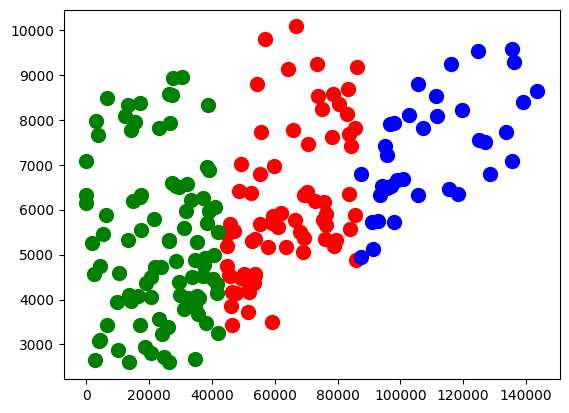

In [5]:
plt.scatter(X[Y_pred==0,0], X[Y_pred==0,1],s=100, c="r")
plt.scatter(X[Y_pred==1,0], X[Y_pred==1,1],s=100, c="g")
plt.scatter(X[Y_pred==2,0], X[Y_pred==2,1],s=100, c="b")
plt.show()

In [6]:
sonuclar = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init="k-means++", random_state=123)
    kmeans.fit(X)
    sonuclar.append(kmeans.inertia_)

sonuclar

[242389902746.875,
 69083288306.74911,
 37362865661.973114,
 19665039712.795002,
 12911353632.710129,
 8631933632.93952,
 6759928141.384078,
 5301517432.980297,
 4172822197.446949,
 3330255811.5491543]

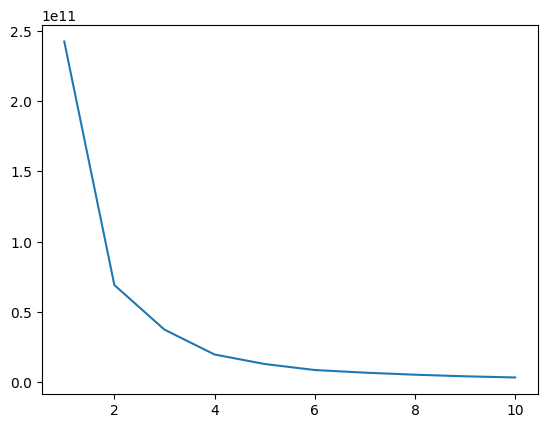

In [7]:
plt.plot(range(1,11), sonuclar)
plt.show()

Hierarchical clustering

In [8]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, affinity="euclidean",linkage="ward")
Y_pred = ac.fit_predict(X)
print(Y_pred)

[0 0 0 2 2 2 2 0 2 1 1 0 1 2 0 0 0 2 0 0 2 2 0 1 0 1 2 0 2 1 2 1 1 0 1 1 1
 2 1 0 0 2 0 2 2 1 1 1 1 0 2 0 0 0 0 0 2 0 1 0 0 0 1 2 1 2 1 0 1 2 0 0 0 0
 2 2 0 0 1 2 2 2 1 1 0 0 0 1 2 2 0 2 0 1 2 1 2 0 2 2 1 0 0 2 2 0 0 1 1 0 0
 0 0 0 0 1 2 0 1 1 2 1 0 0 0 1 2 2 0 2 2 1 1 1 1 2 1 1 0 1 0 2 1 1 0 1 1 1
 1 2 1 1 0 2 1 0 2 1 0 2 1 1 2 1 2 1 1 0 2 2 0 2 2 1 1 2 2 1 0 1 1 0 1 0 0
 0 2 2 1 2 1 2 1 0 2 0 0 1 1 1]


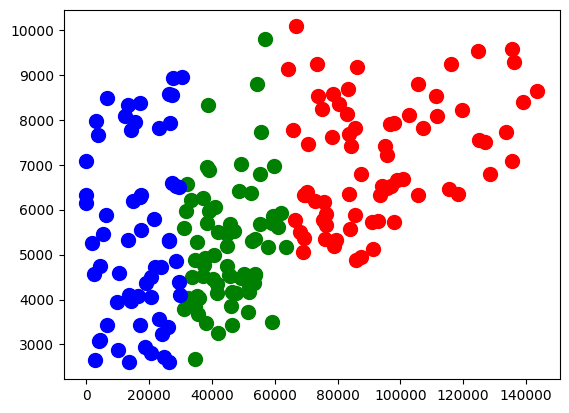

In [9]:
plt.scatter(X[Y_pred==0,0], X[Y_pred==0,1],s=100, c="r")
plt.scatter(X[Y_pred==1,0], X[Y_pred==1,1],s=100, c="g")
plt.scatter(X[Y_pred==2,0], X[Y_pred==2,1],s=100, c="b")
plt.show()

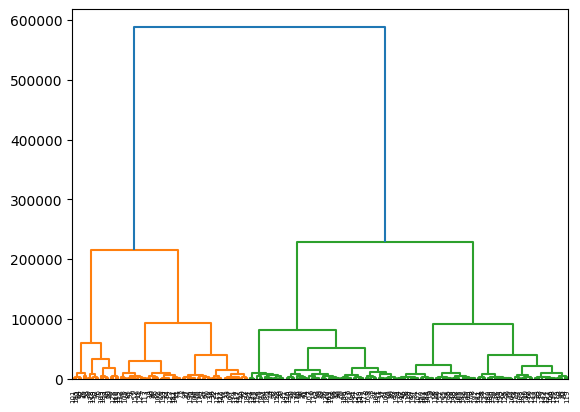

In [10]:
from scipy.cluster import hierarchy as sch 
dendogram = sch.dendrogram(sch.linkage(X, method="ward"))
plt.show()